In [1]:
import numpy as np 
import pandas as pd 
import nltk

# Loading data

In [2]:
df_mail = pd.read_csv('spam.csv',encoding='latin-1')
df_mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df_mail = df_mail[["v1","v2"]]
df_mail

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df_mail = df_mail.rename(columns={"v1":"label", "v2":"mail"})


In [14]:
df_mail['label'] = df_mail['label'].apply(lambda x:0 if x=='ham' else 1)

In [15]:
len(df_mail)

5572

# Exploratory Data Analysis

In [16]:
df_mail.isnull().sum()

label    0
mail     0
dtype: int64

In [17]:
df_mail.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [18]:
df_mail.head()

,label,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df_mail['length'] = df_mail['mail'].apply(len)
df_mail.head(2)

,label,mail,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

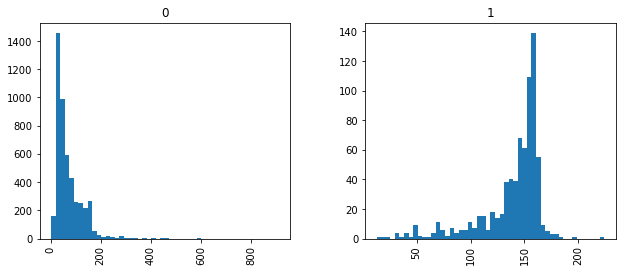

In [24]:
import matplotlib.pyplot as plt

df_mail.hist(column='length', by='label', bins=50,figsize=(10,4))
#0 refers to ham;1 refers to spam

From the above histogram, we can infer that Spam messages have more words than Ham messages

# Text Preprocessing

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [40]:
corpus = []

for i in range(0,len(df_mail)):
    
 # removal of all punctuations    
    words = re.sub('[^a-zA-Z]',' ',df_mail['mail'][i])
 #changing all characters to lowercase   
    words = words.lower()
    
 #Splits into list of words 
    words = words.split()
    
 #Lemmatizing the word and removing the stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    
 #Again join words to form sentences
    words = ' '.join(words)
    
    corpus.append(words)

In [41]:
corpus[1]

'ok lar joking wif u oni'

In [43]:
df_mail['mail'] = corpus
df_mail

,label,mail,length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,u dun say early hor u c already say,49
4,0,nah think go usf life around though,61
...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,161
5568,0,b going esplanade fr home,37
5569,0,pity mood suggestion,57
5570,0,guy bitching acted like interested buying some...,125


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_mail['mail'],
                                                    df_mail['label'],test_size=0.20, 
                                                    random_state=42)

In [90]:
X_test.shape

(1115,)

# Feature Extraction using both CountVectorizer 


In [103]:
from sklearn.feature_extraction.text import CountVectorizer


In [104]:
cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [107]:
X_train.shape

(4457, 6265)

# Fitting the data to model

In [149]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix

In [150]:
NB = BernoulliNB()
NB.fit(X_train,y_train)

BernoulliNB()

In [151]:
y_preds_NB = NB.predict(X_test)
y_preds_NB

array([0, 0, 0, ..., 0, 0, 1])

# 

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_preds_NB)))
print('Precision score: {}'.format(precision_score(y_test, y_preds_NB)))
print('Recall score: {}'.format(recall_score(y_test, y_preds_NB)))
print('F1 score: {}'.format(f1_score(y_test, y_preds_NB)))

Accuracy score: 0.9757847533632287
Precision score: 0.984251968503937
Recall score: 0.8333333333333334
F1 score: 0.9025270758122743


In [153]:
from sklearn.metrics import confusion_matrix

In [154]:
confusion_matrix(y_test, y_preds_NB)

array([[963,   2],
       [ 25, 125]])

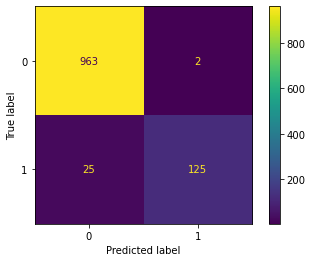

In [156]:
plot_confusion_matrix(NB, X_test, y_test)  

# Now our model is ready to take custom mails!

In [236]:
text = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop'

In [244]:
text

'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop'

In [237]:
def refined_text(text):
    #Removal of extra characters and stop words
    words = re.sub('[^a-zA-Z]',' ',text)
    words = words.lower()
    #Splits into list of words 
    words = words.split()

    #Lemmatizing the word and removing the stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

    #Again join words to form sentences
    words = ' '.join(words)
    return words

In [238]:
refined_word = refined_text(text)

In [239]:
refined_word = [refined_word]
refined_word

['important could entitled compensation mi sold ppi credit card loan please reply ppi info stop opt redacted loan approved receive sm min verification cash hr www redacted co uk opt reply stop']

In [240]:
refined_word = cv.transform(refined_word)

In [241]:
NB.predict(refined_word)

array([1])

Given text is classified as **Spam**

In [245]:
#training error
NB.score(X_train,y_train)

0.9867623962306484

In [246]:
#testing error
NB.score(X_test,y_test)

0.9757847533632287